<a href="https://colab.research.google.com/github/M-Siddique-Umer/365-Days-Challenge-Learnify/blob/main/updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [ ]:
# ===================== Importing Required Libraries =====================
# Importing pandas for data manipulation and numpy for numerical operations
import pandas as pd
import numpy as np


In [ ]:
# ===================== Part (a) =====================

# Load the CSV file into a pandas DataFrame
# Specify the path to the CSV file that contains the data
df = pd.read_csv("/content/3d_printing.csv")


In [ ]:
# Drop any rows where the "Temperature" column has NaN values
# This ensures that we only analyze rows with valid temperature data
df.dropna(subset=["Temperature"], inplace=True)


In [ ]:
# Calculate the mean of the "Temperature" column
mean_temp = df["Temperature"].mean()

# Calculate the standard deviation of the "Temperature" column
std_temp = df["Temperature"].std()


In [ ]:
# Print the results for Part (a)
# Displaying the mean and standard deviation of the temperature

# Print separator for readability
print("=" * 70)

# Display Part (a) information
print("Part (a): Temperature Statistics")

# Print separator for readability
print("=" * 70)

# Display mean temperature and standard deviation rounded to two decimal places
print(f"Mean Temperature: {mean_temp:.2f}")
print(f"Standard Deviation of Temperature: {std_temp:.2f}")


Part (a): Temperature Statistics
Mean Temperature: 210.97
Standard Deviation of Temperature: 16.80


In [ ]:
# ===================== Part (b) =====================

# Define conditions for categorizing the temperature values
# Three categories based on the "Temperature" column: low, medium, and high
conditions = [
    (df['Temperature'] < 200),                          # Temperature below 200 is 'low'
    (df['Temperature'] >= 200) & (df['Temperature'] <= 220), # Temperature between 200 and 220 (inclusive) is 'medium'
    (df['Temperature'] > 220)                            # Temperature above 220 is 'high'
]

# Define the choices corresponding to the conditions
choices = ['low', 'medium', 'high']


In [ ]:
# Create a new column "TempCategory" in the DataFrame based on the conditions
# Use np.select() to assign the appropriate category for each row
df['TempCategory'] = np.select(conditions, choices, default='unknown')

# Calculate the frequency (count) of each category in the "TempCategory" column
frequency = df['TempCategory'].value_counts()

# Calculate the probability of each category (frequency divided by total number of rows)
probability = frequency / len(df)


In [ ]:
# Print the results for Part (b)
# Displaying the frequency and probability of temperature categories

# Print separator for readability
print("=" * 70)

# Display Part (b) information
print("Part (b): Temperature Categories")

# Print separator for readability
print("=" * 70)

# Display frequency of each category
print("Frequency of Temperature Categories:")
print(frequency)

# Display probability table for each category
print("\nProbability Table for Temperature Categories:")
print(probability)

# Save the DataFrame with the new "TempCategory" column to a new CSV file
df.to_csv("data_with_temp_category.csv", index=False)


Part (b): Temperature Categories
Frequency of Temperature Categories:
TempCategory
medium    12
low       10
high       8
Name: count, dtype: int64

Probability Table for Temperature Categories:
TempCategory
medium    0.400000
low       0.333333
high      0.266667
Name: count, dtype: float64


In [ ]:
# ===================== Importing Required Libraries =====================

# Importing LinearRegression for model training and mean_squared_error for evaluating the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# ===================== Part (c) =====================

# Convert 'FlowRate' from categorical text (low, high) to numeric values (0, 1)
df['FlowRate_num'] = df['FlowRate'].str.lower().map({'low': 0, 'high': 1})

# Convert 'Robustness' from categorical text (weak, moderate, strong) to numeric values (0, 1, 2)
df['Robustness_num'] = df['Robustness'].str.lower().map({'weak': 0, 'moderate': 1, 'strong': 2})

# Print separator for readability
print("=" * 70)

# Display information for Part (c)
print("Part (c): Linear Regression Model")

# Print separator for readability
print("=" * 70)

# Check for missing values in relevant columns
print("Missing values in 'FlowRate_num':", df['FlowRate_num'].isnull().sum())
print("Missing values in 'Robustness_num':", df['Robustness_num'].isnull().sum())
print("Missing values in 'TempCategory':", df['TempCategory'].isnull().sum())


Part (c): Linear Regression Model
Missing values in 'FlowRate_num': 0
Missing values in 'Robustness_num': 0
Missing values in 'TempCategory': 0


In [ ]:
# Create dummy variables for 'TempCategory', excluding the first category to avoid multicollinearity
temp_dummies = pd.get_dummies(df['TempCategory'], drop_first=True)

# Prepare feature matrix 'X' (independent variables)
# Combine 'FlowRate_num' and the dummy variables for 'TempCategory'
X = pd.concat([df[['FlowRate_num']], temp_dummies], axis=1)

# Prepare target variable 'y' (dependent variable)
y = df['Robustness_num']

# Remove rows with missing values in either X or y for model training
df_nonnull = pd.concat([X, y], axis=1).dropna()

# Split X and y for non-null rows
X_nonnull = df_nonnull.drop('Robustness_num', axis=1)
y_nonnull = df_nonnull['Robustness_num']

# Check if there are valid rows for training
if len(df_nonnull) == 0:
    print("\nNo valid rows after dropping missing values. Cannot train the model.")
else:
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_nonnull, y_nonnull)

    # Make predictions using the trained model
    y_pred = model.predict(X_nonnull)

    # Calculate the Mean Squared Error (MSE) of the model
    mse = mean_squared_error(y_nonnull, y_pred)

    # Display the model results
    print("\nLinear Regression Model Results")
    print("-" * 70)
    print(f"Intercept: {model.intercept_:.4f}")

    # Display coefficients for each feature
    for col_name, coef_value in zip(X_nonnull.columns, model.coef_):
        print(f"Coefficient for {col_name}: {coef_value:.4f}")

    # Display Mean Squared Error
    print(f"\nMean Squared Error: {mse:.4f}")

    # Print separator for readability
    print("=" * 70)



Linear Regression Model Results
----------------------------------------------------------------------
Intercept: 2.0786
Coefficient for FlowRate_num: -0.5257
Coefficient for low: -1.6157
Coefficient for medium: -0.4429

Mean Squared Error: 0.1334


# Question 2

In [ ]:
# ===================== Importing Required Library =====================

# Import pandas for data manipulation
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/data_with_temp_category.csv")


In [ ]:
# ===================== Part (a) =====================

# Calculate the total number of rows in the DataFrame
total_count = len(df)

# Count the occurrences of "FlowRate" being "fast" (case insensitive)
count_fast = (df["FlowRate"].str.lower() == "fast").sum()  # or "high"

# Calculate the probability P(FlowRate = fast)
p_flow_fast = count_fast / total_count

# Print the result for part (a)
print("(a) P(FlowRate=fast) =", p_flow_fast)


(a) P(FlowRate=fast) = 0.0


In [ ]:
# ===================== Part (b) =====================

# (b1) Calculate the probability distribution for the "FlowRate" values
p_flow = df["FlowRate"].value_counts(normalize=True)
print("\n(b1) Probability distribution for FlowRate:")
print(p_flow)

# (b2) Calculate the conditional probability P(Robustness | Temperature, FlowRate)
counts = df.groupby(["TempCategory", "FlowRate", "Robustness"]).size()
cond_probs = counts.groupby(level=[0, 1]).apply(lambda x: x / x.sum())
print("\n(b2) P(Robustness | Temperature, FlowRate):")
print(cond_probs)



(b1) Probability distribution for FlowRate:
FlowRate
Low     0.5
High    0.5
Name: proportion, dtype: float64

(b2) P(Robustness | Temperature, FlowRate):
TempCategory  FlowRate  TempCategory  FlowRate  Robustness
high          High      high          High      Moderate      0.400000
                                                Strong        0.600000
              Low       high          Low       Strong        1.000000
low           High      low           High      Weak          1.000000
              Low       low           Low       Moderate      0.400000
                                                Weak          0.600000
medium        High      medium        High      Moderate      1.000000
              Low       medium        Low       Moderate      0.285714
                                                Strong        0.714286
dtype: float64


In [ ]:
# ===================== Part (c) =====================

# (c) Calculate probabilities for the "Robustness" categories
robust_counts = df["Robustness"].value_counts(normalize=True)
p_W = robust_counts.get("Weak", 0)
p_M = robust_counts.get("Moderate", 0)
p_S = robust_counts.get("Strong", 0)

# Calculate P(PassesQA)
p_passQA = 0.3 * p_W + 0.6 * p_M + 0.9 * p_S

# Calculate conditional probabilities P(Robustness | PassesQA)
p_W_pass = (0.3 * p_W) / p_passQA
p_M_pass = (0.6 * p_M) / p_passQA
p_S_pass = (0.9 * p_S) / p_passQA

# Calculate the probability of breaks given passesQA
p_break_passQA = 0.5 * p_W_pass + 0.1 * p_M_pass + 0.01 * p_S_pass

# Print the result for part (c)
print("\n(c) P(Breaks | PassesQA) =", p_break_passQA)



(c) P(Breaks | PassesQA) = 0.10365079365079366


In [ ]:
# ===================== Part (d) =====================

# (d) Calculate the conditional probability P(Weak | Breaks, PassesQA)
p_weak_given_break_pass = (0.5 * p_W_pass) / p_break_passQA
print("\n(d) P(Weak | Breaks, PassesQA) =", p_weak_given_break_pass)



(d) P(Weak | Breaks, PassesQA) = 0.6125574272588056


In [ ]:
pip install pyagrum

# Question 3

In [ ]:
# ===================== Importing Required Libraries =====================
# Importing pyAgrum library for creating and manipulating Bayesian Networks
import pyAgrum as gum
# Importing pyAgrum notebook utility for visualization
import pyAgrum.lib.notebook as gnb


In [ ]:
# ===================== Part (a) - Defining the Bayesian Network =====================

# Create a new Bayesian Network with the name "LisaScenario"
bn = gum.BayesNet("LisaScenario")

# Define the "TemperatureCategory" variable with 3 possible labels: Low, Medium, High
temp_var = gum.LabelizedVariable("TemperatureCategory", "Temperature category", 0)
temp_var.addLabel("Low")
temp_var.addLabel("Medium")
temp_var.addLabel("High")
temp_id = bn.add(temp_var)

# Define the "FlowRate" variable with 2 possible labels: Low, High
flow_var = gum.LabelizedVariable("FlowRate", "Flow rate", 0)
flow_var.addLabel("Low")
flow_var.addLabel("High")
flow_id = bn.add(flow_var)

# Define the "Robustness" variable with 3 possible labels: Weak, Moderate, Strong
rob_var = gum.LabelizedVariable("Robustness", "Robustness level", 0)
rob_var.addLabel("Weak")
rob_var.addLabel("Moderate")
rob_var.addLabel("Strong")
rob_id = bn.add(rob_var)

# Define the "QA" variable with 2 possible labels: Fail, Pass
qa_var = gum.LabelizedVariable("QA", "QA outcome", 0)
qa_var.addLabel("Fail")
qa_var.addLabel("Pass")
qa_id = bn.add(qa_var)

# Define the "Breaks" variable with 2 possible labels: False, True
br_var = gum.LabelizedVariable("Breaks", "Product breaks?", 0)
br_var.addLabel("False")
br_var.addLabel("True")
br_id = bn.add(br_var)


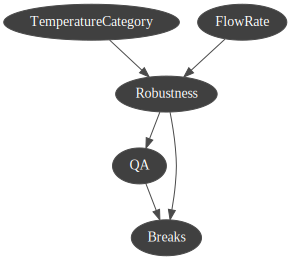

In [ ]:
# ===================== Adding Arcs (Relationships) Between Variables =====================

# Adding directed edges (arcs) between the variables to define the dependencies

# "TemperatureCategory" influences "Robustness"
bn.addArc(temp_id, rob_id)

# "FlowRate" influences "Robustness"
bn.addArc(flow_id, rob_id)

# "Robustness" influences both "QA" and "Breaks"
bn.addArc(rob_id, qa_id)
bn.addArc(rob_id, br_id)

# "QA" influences "Breaks"
bn.addArc(qa_id, br_id)

# Visualize the Bayesian Network
gnb.showBN(bn)


In [ ]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pandas as pd
#===================== (b) =====================
data = pd.read_csv("/content/data_with_temp_category.csv")

bn = gum.BayesNet("LisaScenario")


temp_var = gum.LabelizedVariable("TempCategory", "Temperature category", 0)

temp_var.addLabel("low")

temp_var.addLabel("medium")

temp_var.addLabel("high")

temp_id = bn.add(temp_var)

flow_var = gum.LabelizedVariable("FlowRate", "Flow rate", 0)

flow_var.addLabel("Low")

flow_var.addLabel("High")

flow_id = bn.add(flow_var)

rob_var = gum.LabelizedVariable("Robustness", "Robustness level", 0)

rob_var.addLabel("Weak")

rob_var.addLabel("Moderate")

rob_var.addLabel("Strong")


rob_id = bn.add(rob_var)

qa_var = gum.LabelizedVariable("QA", "QA outcome", 0)

qa_var.addLabel("Fail")

qa_var.addLabel("Pass")

qa_id = bn.add(qa_var)

br_var = gum.LabelizedVariable("Breaks", "Product breaks?", 0)

br_var.addLabel("False")

br_var.addLabel("True")

br_id = bn.add(br_var)

bn.addArc(temp_id, rob_id)

bn.addArc(flow_id, rob_id)

bn.addArc(rob_id, qa_id)

bn.addArc(rob_id, br_id)

bn.addArc(qa_id, br_id)

temp_counts = data["TempCategory"].value_counts(normalize=True)

bn.cpt(temp_id)[0] = temp_counts.get("low", 0)

bn.cpt(temp_id)[1] = temp_counts.get("medium", 0)

bn.cpt(temp_id)[2] = temp_counts.get("high", 0)

flow_counts = data["FlowRate"].value_counts(normalize=True)

bn.cpt(flow_id)[0] = flow_counts.get("Low", 0)

bn.cpt(flow_id)[1] = flow_counts.get("High", 0)

robustness_counts = data.groupby(["TempCategory", "FlowRate", "Robustness"]).size().unstack(fill_value=0)

robustness_probs = robustness_counts.div(robustness_counts.sum(axis=1), axis=0)

temp_map = {"low": 0, "medium": 1, "high": 2}

flow_map = {"Low": 0, "High": 1}

robustness_map = {"Weak": 0, "Moderate": 1, "Strong": 2}

for temp, temp_idx in temp_map.items():

    for flow, flow_idx in flow_map.items():
        if (temp, flow) in robustness_probs.index:
            bn.cpt(rob_id)[{"TempCategory": temp_idx, "FlowRate": flow_idx}] = [

                robustness_probs.loc[(temp, flow), "Weak"],
                robustness_probs.loc[(temp, flow), "Moderate"],
                robustness_probs.loc[(temp, flow), "Strong"],
            ]

bn.cpt(qa_id)[{"Robustness": robustness_map["Weak"]}] = [0.5, 0.5]

bn.cpt(qa_id)[{"Robustness": robustness_map["Moderate"]}] = [0.5, 0.5]

bn.cpt(qa_id)[{"Robustness": robustness_map["Strong"]}] = [0.5, 0.5]

bn.cpt(br_id)[{"Robustness": robustness_map["Weak"], "QA": 0}] = [0.5, 0.5]

bn.cpt(br_id)[{"Robustness": robustness_map["Weak"], "QA": 1}] = [0.5, 0.5]

bn.cpt(br_id)[{"Robustness": robustness_map["Moderate"], "QA": 0}] = [0.5, 0.5]

bn.cpt(br_id)[{"Robustness": robustness_map["Moderate"], "QA": 1}] = [0.5, 0.5]

bn.cpt(br_id)[{"Robustness": robustness_map["Strong"], "QA": 0}] = [0.5, 0.5]


bn.cpt(br_id)[{"Robustness": robustness_map["Strong"], "QA": 1}] = [0.5, 0.5]

ie = gum.LazyPropagation(bn)

ie.setEvidence({"FlowRate": flow_map["High"], "Breaks": 1})

ie.makeInference()

result = ie.posterior(rob_id)

print("Probability that the product was 'Strongly robust' given high flow rate and it broke:")

print(result[robustness_map["Strong"]])

Probability that the product was 'Strongly robust' given high flow rate and it broke:
0.16


In [ ]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pandas as pd

#===================== (c) =====================

# Read the data from the CSV file
data = pd.read_csv("/content/data_with_temp_category.csv")

# Initialize the Bayesian Network
bn = gum.BayesNet("LisaScenario")


In [ ]:
# Define the temperature category variable and its labels
temp_var = gum.LabelizedVariable("TempCategory", "Temperature category", 0)
temp_var.addLabel("low")
temp_var.addLabel("medium")
temp_var.addLabel("high")

# Add temperature node to the network
temp_id = bn.add(temp_var)

# Define flow rate variable and its labels
flow_var = gum.LabelizedVariable("FlowRate", "Flow rate", 0)
flow_var.addLabel("Low")
flow_var.addLabel("High")

# Add flow rate node to the network
flow_id = bn.add(flow_var)

# Define robustness level variable and its labels
rob_var = gum.LabelizedVariable("Robustness", "Robustness level", 0)
rob_var.addLabel("Weak")
rob_var.addLabel("Moderate")
rob_var.addLabel("Strong")

# Add robustness node to the network
rob_id = bn.add(rob_var)

# Define QA outcome variable and its labels
qa_var = gum.LabelizedVariable("QA", "QA outcome", 0)
qa_var.addLabel("Fail")
qa_var.addLabel("Pass")

# Add QA node to the network
qa_id = bn.add(qa_var)

# Define product breaks variable and its labels
br_var = gum.LabelizedVariable("Breaks", "Product breaks?", 0)
br_var.addLabel("False")
br_var.addLabel("True")

# Add breaks node to the network
br_id = bn.add(br_var)


In [ ]:
# Add arcs (dependencies) between nodes
bn.addArc(temp_id, rob_id)
bn.addArc(flow_id, rob_id)
bn.addArc(rob_id, qa_id)
bn.addArc(rob_id, br_id)
bn.addArc(qa_id, br_id)

# Set CPT for TempCategory based on data
temp_counts = data["TempCategory"].value_counts(normalize=True)
bn.cpt(temp_id)[0] = temp_counts.get("low", 0)
bn.cpt(temp_id)[1] = temp_counts.get("medium", 0)
bn.cpt(temp_id)[2] = temp_counts.get("high", 0)

# Set CPT for FlowRate based on data
flow_counts = data["FlowRate"].value_counts(normalize=True)
bn.cpt(flow_id)[0] = flow_counts.get("Low", 0)
bn.cpt(flow_id)[1] = flow_counts.get("High", 0)

# Set CPT for Robustness based on data
robustness_counts = data.groupby(["TempCategory", "FlowRate", "Robustness"]).size().unstack(fill_value=0)
robustness_probs = robustness_counts.div(robustness_counts.sum(axis=1), axis=0)

# Map labels to indices for convenience
temp_map = {"low": 0, "medium": 1, "high": 2}
flow_map = {"Low": 0, "High": 1}
robustness_map = {"Weak": 0, "Moderate": 1, "Strong": 2}

# Populate Robustness CPT using the probabilities calculated
for temp, temp_idx in temp_map.items():
    for flow, flow_idx in flow_map.items():
        if (temp, flow) in robustness_probs.index:
            bn.cpt(rob_id)[{"TempCategory": temp_idx, "FlowRate": flow_idx}] = [
                robustness_probs.loc[(temp, flow), "Weak"],
                robustness_probs.loc[(temp, flow), "Moderate"],
                robustness_probs.loc[(temp, flow), "Strong"],
            ]


In [ ]:
# Set CPT for QA based on Robustness
bn.cpt(qa_id)[{"Robustness": robustness_map["Weak"]}] = [0.5, 0.5]
bn.cpt(qa_id)[{"Robustness": robustness_map["Moderate"]}] = [0.5, 0.5]
bn.cpt(qa_id)[{"Robustness": robustness_map["Strong"]}] = [0.5, 0.5]

# Set CPT for Breaks based on Robustness and QA outcome
bn.cpt(br_id)[{"Robustness": robustness_map["Weak"], "QA": 0}] = [0.5, 0.5]
bn.cpt(br_id)[{"Robustness": robustness_map["Weak"], "QA": 1}] = [0.5, 0.5]
bn.cpt(br_id)[{"Robustness": robustness_map["Moderate"], "QA": 0}] = [0.5, 0.5]
bn.cpt(br_id)[{"Robustness": robustness_map["Moderate"], "QA": 1}] = [0.5, 0.5]
bn.cpt(br_id)[{"Robustness": robustness_map["Strong"], "QA": 0}] = [0.5, 0.5]
bn.cpt(br_id)[{"Robustness": robustness_map["Strong"], "QA": 1}] = [0.5, 0.5]


In [ ]:
# Perform inference for low temperature scenario
ie_low = gum.LazyPropagation(bn)
ie_low.setEvidence({"TempCategory": temp_map["low"]})
ie_low.makeInference()
p_break_low = ie_low.posterior(br_id)[1]

# Perform inference for high temperature scenario
ie_high = gum.LazyPropagation(bn)
ie_high.setEvidence({"TempCategory": temp_map["high"]})
ie_high.makeInference()
p_break_high = ie_high.posterior(br_id)[1]


In [ ]:
# Calculate the relative risk between low and high temperature
relative_risk = p_break_low / p_break_high

# Print results for probabilities and relative risk
print(f"Probability of breaking at low temperature: {p_break_low:.4f}")
print(f"Probability of breaking at high temperature: {p_break_high:.4f}")
print(f"Relative risk (low vs. high temperature): {relative_risk:.4f}")


Probability of breaking at low temperature: 0.5000
Probability of breaking at high temperature: 0.5000
Relative risk (low vs. high temperature): 1.0000


# Question 4

In [ ]:
# Importing the pyAgrum library for influence diagram creation and visualization.
import pyAgrum as gum
# Importing the pyAgrum notebook tools for easy visualization of the influence diagram.
import pyAgrum.lib.notebook as gnb


In [ ]:
# Now, let's create an empty influence diagram object.
influence_diagram = gum.InfluenceDiagram()


In [ ]:
# Defining a variable for the "Quality Assurance Decision".
qa_var = gum.LabelizedVariable("QA", "Quality Assurance Decision", 0)

# Adding possible labels for the QA decision: "Keep" and "Drop".
qa_var.addLabel("Keep")
qa_var.addLabel("Drop")


(pyAgrum.LabelizedVariable@0x32959e0) QA:Labelized({Keep|Drop})

In [ ]:
# Defining a variable for the "Robustness Level".
robustness_var = gum.LabelizedVariable("Robustness", "Robustness Level", 0)

# Adding possible labels for the Robustness: "Weak", "Moderate", "Strong".
robustness_var.addLabel("Weak")
robustness_var.addLabel("Moderate")
robustness_var.addLabel("Strong")


(pyAgrum.LabelizedVariable@0x3b54080) Robustness:Labelized({Weak|Moderate|Strong})

In [ ]:
# Defining a variable for the "Product Breaks?".
breaks_var = gum.LabelizedVariable("Breaks", "Product Breaks?", 0)

# Adding possible labels for the Breaks: "False" and "True".
breaks_var.addLabel("False")
breaks_var.addLabel("True")


(pyAgrum.LabelizedVariable@0x391f700) Breaks:Labelized({False|True})

In [ ]:
# Adding the QA decision variable as a decision node in the influence diagram.
qa_decision = influence_diagram.addDecisionNode(qa_var)

# Adding the Robustness variable as a chance node in the influence diagram.
robustness = influence_diagram.addChanceNode(robustness_var)

# Adding the Breaks variable as a chance node in the influence diagram.
breaks = influence_diagram.addChanceNode(breaks_var)

# Adding a utility node to the influence diagram for the final outcome.
utility = influence_diagram.addUtilityNode("Utility")


In [ ]:
# Adding an arc from the QA decision to the Robustness node.
influence_diagram.addArc(qa_decision, robustness)

# Adding an arc from the Robustness node to the Breaks node.
influence_diagram.addArc(robustness, breaks)

# Adding an arc from the QA decision to the Utility node.
influence_diagram.addArc(qa_decision, utility)

# Adding an arc from the Breaks node to the Utility node.
influence_diagram.addArc(breaks, utility)


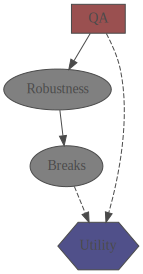

In [ ]:
# Finally, let's visualize the influence diagram to see the structure.
gnb.showInfluenceDiagram(influence_diagram)


In [ ]:
# Defining constants for profit and loss.
profit_if_sold = 2000  # Profit if the product is sold.
loss_if_breaks = -10000  # Loss if the product breaks.

# Defining the probability distributions for robustness with QA (keep) and without QA (drop).
p_robustness_keep = {
    "Weak": 0.1,
    "Moderate": 0.3,
    "Strong": 0.6
}
p_robustness_drop = {
    "Weak": 0.5,
    "Moderate": 0.3,
    "Strong": 0.2
}

# Defining the probability of breaks for different robustness levels.
p_breaks = {
    "Weak": 0.8,
    "Moderate": 0.3,
    "Strong": 0.1
}


In [ ]:
# Calculating expected utility if Lisa keeps the QA process.
expected_utility_keep = 0
for robustness, p_rob in p_robustness_keep.items():
    p_break = p_breaks[robustness]
    expected_utility_keep += p_rob * (p_break * loss_if_breaks + (1 - p_break) * profit_if_sold)

# Calculating expected utility if Lisa drops the QA process.
expected_utility_drop = 0
for robustness, p_rob in p_robustness_drop.items():
    p_break = p_breaks[robustness]
    expected_utility_drop += p_rob * (p_break * loss_if_breaks + (1 - p_break) * profit_if_sold)


In [ ]:
# Displaying expected utilities for both scenarios.
print(f"Expected utility if Lisa keeps QA: £{expected_utility_keep:.2f}")
print(f"Expected utility if Lisa drops QA: £{expected_utility_drop:.2f}")

# Making the decision based on the calculated expected utilities.
if expected_utility_keep > expected_utility_drop:
    print("Lisa should keep the QA process.")
else:
    print("Lisa should drop the QA process.")


Expected utility if Lisa keeps QA: £-760.00
Expected utility if Lisa drops QA: £-4120.00
Lisa should keep the QA process.


In [ ]:
# Defining the probability distributions for robustness with QA (keep) and without QA (drop) at low flow rate.
p_robustness_keep_low_flow = {
    "Weak": 0.05,
    "Moderate": 0.25,
    "Strong": 0.7
}

p_robustness_drop_low_flow = {
    "Weak": 0.3,
    "Moderate": 0.4,
    "Strong": 0.3
}


In [ ]:
# Calculating expected utility if Lisa keeps the QA process at low flow rate.
expected_utility_keep_low_flow = 0
for robustness, p_rob in p_robustness_keep_low_flow.items():
    p_break = p_breaks[robustness]
    expected_utility_keep_low_flow += p_rob * (p_break * loss_if_breaks + (1 - p_break) * profit_if_sold)

# Calculating expected utility if Lisa drops the QA process at low flow rate.
expected_utility_drop_low_flow = 0
for robustness, p_rob in p_robustness_drop_low_flow.items():
    p_break = p_breaks[robustness]
    expected_utility_drop_low_flow += p_rob * (p_break * loss_if_breaks + (1 - p_break) * profit_if_sold)


In [ ]:
# Displaying expected utilities for both scenarios at low flow rate.
print(f"Expected utility if Lisa keeps QA with low flow rate: £{expected_utility_keep_low_flow:.2f}")
print(f"Expected utility if Lisa drops QA with low flow rate: £{expected_utility_drop_low_flow:.2f}")

# Calculating the improvement worth to Lisa per product based on the difference in expected utility.
improvement_worth = max(expected_utility_keep_low_flow, expected_utility_drop_low_flow) - max(expected_utility_keep, expected_utility_drop)

# Displaying the improvement worth.
print(f"Improvement worth to Lisa (per product): £{improvement_worth:.2f}")


Expected utility if Lisa keeps QA with low flow rate: £-220.00
Expected utility if Lisa drops QA with low flow rate: £-2680.00
Improvement worth to Lisa (per product): £540.00


In [ ]:
# Defining the probability distributions for robustness at different temperatures: low, medium, and high.
p_robustness_temp = {
    "low": {"Weak": 0.2, "Moderate": 0.5, "Strong": 0.3},
    "medium": {"Weak": 0.1, "Moderate": 0.4, "Strong": 0.5},
    "high": {"Weak": 0.05, "Moderate": 0.3, "Strong": 0.65}
}


In [ ]:
# Calculating the expected utility for each temperature scenario.
expected_utility_temp = {}
for temp, p_rob in p_robustness_temp.items():
    expected_utility_temp[temp] = 0
    for robustness, p_rob_val in p_rob.items():
        p_break = p_breaks[robustness]
        expected_utility_temp[temp] += p_rob_val * (p_break * loss_if_breaks + (1 - p_break) * profit_if_sold)


In [ ]:
# Displaying the expected utility for each temperature scenario.
for temp, utility in expected_utility_temp.items():
    print(f"Expected utility for {temp} temperature: £{utility:.2f}")

# Calculating the total expected utility with selective QA.
total_expected_utility_selective = sum(expected_utility_temp.values()) / len(expected_utility_temp)
print(f"Total expected utility with selective QA: £{total_expected_utility_selective:.2f}")

# Calculating the worth of sharing temperature information (per product).
worth_selective_qa = total_expected_utility_selective - max(expected_utility_keep, expected_utility_drop)
print(f"Worth of sharing temperature information (per product): £{worth_selective_qa:.2f}")


Expected utility for low temperature: £-2080.00
Expected utility for medium temperature: £-1000.00
Expected utility for high temperature: £-340.00
Total expected utility with selective QA: £-1140.00
Worth of sharing temperature information (per product): £-380.00


# Question 5

In [ ]:
# Importing necessary libraries for Bayesian network creation and visualization.
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.display import Image

# Creating a new Bayesian network called 'DrugEffectiveness'.
bn = gum.BayesNet('DrugEffectiveness')


In [ ]:
# Defining and adding nodes to the Bayesian network:
# - 'Diagnosis Time' with two possible states: 'Early' and 'Late'
Diagnosis_Time = bn.add(gum.LabelizedVariable('Diagnosis Time', 'Diagnosis Time', ['Early', 'Late']))

# - 'Drug Given' with two possible drugs: 'A' and 'B'
Drug_Given = bn.add(gum.LabelizedVariable('Drug Given', 'Drug Given', ['A', 'B']))

# - 'Recovery' with two possible outcomes: 'Yes' and 'No'
Recovery = bn.add(gum.LabelizedVariable('Recovery', 'Recovery', ['Yes', 'No']))

# Adding directed arcs to represent relationships between variables:
bn.addArc(Diagnosis_Time, Drug_Given)
bn.addArc(Diagnosis_Time, Recovery)
bn.addArc(Drug_Given, Recovery)


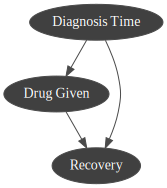

In [ ]:
# Defining Conditional Probability Tables (CPT) for each variable:
bn.cpt(Diagnosis_Time).fillWith([0.6, 0.4])  # Probability for 'Diagnosis Time'

bn.cpt(Drug_Given)[{'Diagnosis Time': 'Early'}] = [0.9, 0.1]  # Probabilities for 'Drug Given' given 'Early' Diagnosis Time
bn.cpt(Drug_Given)[{'Diagnosis Time': 'Late'}] = [0.4, 0.6]   # Probabilities for 'Drug Given' given 'Late' Diagnosis Time

bn.cpt(Recovery)[{'Diagnosis Time': 'Early', 'Drug Given': 'A'}] = [0.8, 0.2]  # 'Recovery' probabilities for 'Early' Diagnosis Time and 'Drug A'
bn.cpt(Recovery)[{'Diagnosis Time': 'Early', 'Drug Given': 'B'}] = [0.9, 0.1]  # 'Recovery' probabilities for 'Early' Diagnosis Time and 'Drug B'
bn.cpt(Recovery)[{'Diagnosis Time': 'Late', 'Drug Given': 'A'}] = [0.5, 0.5]   # 'Recovery' probabilities for 'Late' Diagnosis Time and 'Drug A'
bn.cpt(Recovery)[{'Diagnosis Time': 'Late', 'Drug Given': 'B'}] = [0.6, 0.4]   # 'Recovery' probabilities for 'Late' Diagnosis Time and 'Drug B'

# Visualizing the Bayesian network
gnb.showBN(bn)


In [ ]:
# Defining probabilities for Diagnosis Time and Drug Given based on previous assumptions
P_D_early = 0.6  # Probability that the diagnosis is made early
P_D_late = 0.4   # Probability that the diagnosis is made late

P_GA_given_D_early = 0.9  # Probability of giving drug A if diagnosed early
P_GB_given_D_early = 0.1  # Probability of giving drug B if diagnosed early
P_GA_given_D_late = 0.4   # Probability of giving drug A if diagnosed late
P_GB_given_D_late = 0.6   # Probability of giving drug B if diagnosed late

# Defining probabilities of not recovering given diagnosis and drug combination
P_R_no_given_D_early_GA = 0.2  # Probability of not recovering with Drug A and early diagnosis
P_R_no_given_D_early_GB = 0.1  # Probability of not recovering with Drug B and early diagnosis
P_R_no_given_D_late_GA = 0.5   # Probability of not recovering with Drug A and late diagnosis
P_R_no_given_D_late_GB = 0.4   # Probability of not recovering with Drug B and late diagnosis


In [ ]:
# Calculating the probability of giving drug A or drug B based on diagnosis time
P_GA = (P_GA_given_D_early * P_D_early) + (P_GA_given_D_late * P_D_late)
P_GB = (P_GB_given_D_early * P_D_early) + (P_GB_given_D_late * P_D_late)

# Calculating joint probability of not recovering and receiving each drug
P_R_no_and_GA = (P_R_no_given_D_early_GA * P_GA_given_D_early * P_D_early) + \
                (P_R_no_given_D_late_GA * P_GA_given_D_late * P_D_late)

P_R_no_and_GB = (P_R_no_given_D_early_GB * P_GB_given_D_early * P_D_early) + \
                (P_R_no_given_D_late_GB * P_GB_given_D_late * P_D_late)


In [ ]:
# Calculating the conditional probabilities of not recovering given each drug
P_R_no_given_GA = P_R_no_and_GA / P_GA
P_R_no_given_GB = P_R_no_and_GB / P_GB

# Displaying the absolute risks of not recovering with each drug
print("Part b) Absolute Risks of Not Recovering:")

print(f"Drug A: {P_R_no_given_GA:.4f} ({P_R_no_given_GA * 100:.2f}%)")
print(f"Drug B: {P_R_no_given_GB:.4f} ({P_R_no_given_GB * 100:.2f}%)")


Part b) Absolute Risks of Not Recovering:
Drug A: 0.2686 (26.86%)
Drug B: 0.3400 (34.00%)


In [ ]:
# Assigning the absolute risk of not recovering for Drug A and Drug B (calculated earlier)
absolute_risk_A = P_R_no_given_GA
absolute_risk_B = P_R_no_given_GB

# Calculating the overall recovery rate for each drug (1 - absolute risk)
recovery_rate_A_overall = 1 - absolute_risk_A
recovery_rate_B_overall = 1 - absolute_risk_B


In [ ]:
# Defining the conditional recovery rates based on diagnosis time and drug given
P_R_yes_given_D_early_GA = 0.8  # Recovery rate for Drug A with early diagnosis
P_R_yes_given_D_early_GB = 0.9  # Recovery rate for Drug B with early diagnosis
P_R_yes_given_D_late_GA = 0.5   # Recovery rate for Drug A with late diagnosis
P_R_yes_given_D_late_GB = 0.6   # Recovery rate for Drug B with late diagnosis


In [ ]:
# Displaying overall recovery rates for both drugs
print("\nPart c) Analysis of Doctor's Conclusion:")
print(f"Overall recovery rate with Drug A: {recovery_rate_A_overall:.4f} ({recovery_rate_A_overall * 100:.2f}%)")
print(f"Overall recovery rate with Drug B: {recovery_rate_B_overall:.4f} ({recovery_rate_B_overall * 100:.2f}%)")

# Displaying conditional recovery rates for early and late diagnosis
print("\nConditional recovery rates:")
print(f"Early Diagnosis - Drug A: {P_R_yes_given_D_early_GA * 100:.0f}%, Drug B: {P_R_yes_given_D_early_GB * 100:.0f}%")
print(f"Late Diagnosis  - Drug A: {P_R_yes_given_D_late_GA * 100:.0f}%, Drug B: {P_R_yes_given_D_late_GB * 100:.0f}%")

# Analyzing the doctor's conclusion
if recovery_rate_A_overall > recovery_rate_B_overall:
    print("\nThe doctor concludes Drug A is more effective based on overall recovery rates.")
    print("Is he right? No, because:")
    print("- Drug B has higher recovery rates in both early (90% vs 80%) and late (60% vs 50%) diagnoses.")
    print("- The overall rate favors Drug A due to its frequent use in early cases (90% of early vs 40% of late),")
    print("  where recovery is easier, skewing the results.")
    print("Phenomenon: Simpson's Paradox")
else:
    print("Unexpected result: Check calculations.")



Part c) Analysis of Doctor's Conclusion:
Overall recovery rate with Drug A: 0.7314 (73.14%)
Overall recovery rate with Drug B: 0.6600 (66.00%)

Conditional recovery rates:
Early Diagnosis - Drug A: 80%, Drug B: 90%
Late Diagnosis  - Drug A: 50%, Drug B: 60%

The doctor concludes Drug A is more effective based on overall recovery rates.
Is he right? No, because:
- Drug B has higher recovery rates in both early (90% vs 80%) and late (60% vs 50%) diagnoses.
- The overall rate favors Drug A due to its frequent use in early cases (90% of early vs 40% of late),
  where recovery is easier, skewing the results.
Phenomenon: Simpson's Paradox
